In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from scipy import stats
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import plotly.express as ex
from tabulate import tabulate

import seaborn as sns
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mutual_info_score

import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stroke_data.csv')
#data = pd.read_csv('/Users/tharunkumarbandaru/Downloads/stroke_data.csv')


In [13]:
orig_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stroke_data.csv')

In [14]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43400 non-null  int64  
 1   gender          43400 non-null  object 
 2   age             43400 non-null  float64
 3   married         43400 non-null  object 
 4   hypertension    43400 non-null  int64  
 5   heart_disease   43400 non-null  int64  
 6   occupation      43400 non-null  object 
 7   residence       43400 non-null  object 
 8   metric_1        43400 non-null  float64
 9   metric_2        41938 non-null  float64
 10  metric_3        43400 non-null  int64  
 11  metric_4        43400 non-null  float64
 12  metric_5        43400 non-null  float64
 13  smoking_status  30108 non-null  object 
 14  stroke          43400 non-null  int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 5.0+ MB


In [15]:
orig_data.isnull().sum()/len(orig_data)*100

id                 0.000000
gender             0.000000
age                0.000000
married            0.000000
hypertension       0.000000
heart_disease      0.000000
occupation         0.000000
residence          0.000000
metric_1           0.000000
metric_2           3.368664
metric_3           0.000000
metric_4           0.000000
metric_5           0.000000
smoking_status    30.626728
stroke             0.000000
dtype: float64

In [16]:
orig_data.head()

id  gender   age married  hypertension  heart_disease occupation residence  \
0   1    Male   3.0      No             0              0          A     Rural   
1   2    Male  58.0     Yes             1              0          B     Urban   
2   3  Female   8.0      No             0              0          B     Urban   
3   4  Female  70.0     Yes             0              0          B     Rural   
4   5    Male  14.0      No             0              0          C     Rural   

   metric_1  metric_2  metric_3  metric_4  metric_5   smoking_status  stroke  
0     95.12      18.0         1     99.35     95.12              NaN       0  
1     87.96      39.2         1     99.70     87.96     never smoked       0  
2    110.89      17.6         0     96.35    110.89              NaN       0  
3     69.04      35.9         0     95.52     69.04  formerly smoked       0  
4    161.28      19.1         1     95.10    161.28              NaN       0

metric_2 and smoking_status has null values

In [17]:
orig_data["smoking_status"].value_counts(normalize=True)

never smoked       0.533181
formerly smoked    0.248871
smokes             0.217949
Name: smoking_status, dtype: float64

In [18]:
data_types = data.dtypes
categorical_cols = data_types[data_types == "object"].index.tolist() + data_types[data_types == "category"].index.tolist()
categorical_cols

['gender', 'married', 'occupation', 'residence', 'smoking_status']

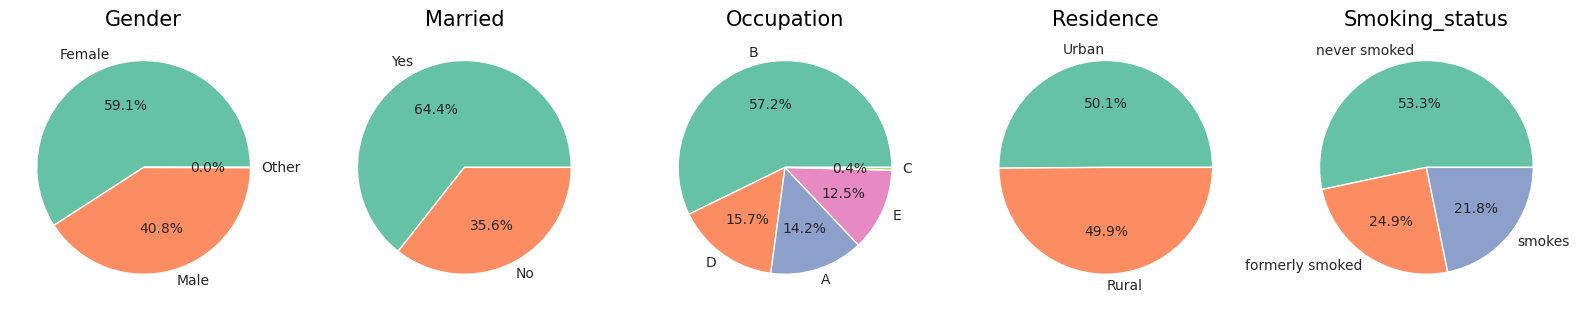

In [19]:

fig, axs = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(20, 10))
sns.set_style('darkgrid')

for i, feature in enumerate(categorical_cols):
    values = data[feature].value_counts().values
    labels = data[feature].value_counts().index
    axs[i].pie(values, labels=labels, autopct="%1.1f%%", colors=sns.color_palette("Set2"))
    axs[i].set_title(feature.capitalize(), fontsize=15)

plt.show()


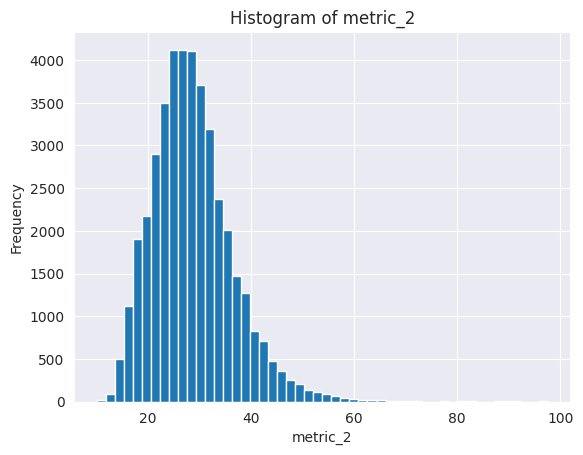

In [20]:
""" 
"""

# Create a histogram of metric2
plt.hist(data['metric_2'].dropna(), bins=50)

# Add labels and title
plt.xlabel('metric_2')
plt.ylabel('Frequency')
plt.title('Histogram of metric_2')

# Show the plot
plt.show()

In [21]:
# create tables
stroke_0_table = pd.crosstab(index=data[data['stroke']==0]['smoking_status'], columns='count')
stroke_1_table = pd.crosstab(index=data[data['stroke']==1]['smoking_status'], columns='count')

# print tables
print("for stroke = 0")
print(tabulate(stroke_0_table, headers='keys', tablefmt='psql'))

print("for stroke = 1")
print(tabulate(stroke_1_table, headers='keys', tablefmt='psql'))


for stroke = 0
+------------------+---------+
| smoking_status   |   count |
|------------------+---------|
| formerly smoked  |    7272 |
| never smoked     |   15769 |
| smokes           |    6429 |
+------------------+---------+
for stroke = 1
+------------------+---------+
| smoking_status   |   count |
|------------------+---------|
| formerly smoked  |     221 |
| never smoked     |     284 |
| smokes           |     133 |
+------------------+---------+


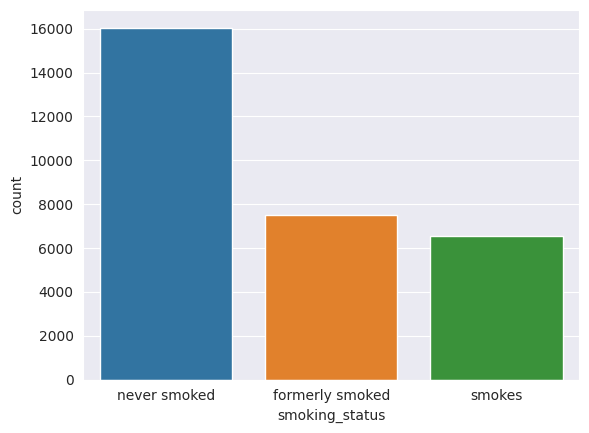

In [22]:
# Assuming smoking_status is a column in your DataFrame
sns.countplot(data=data, x='smoking_status')
plt.show()


In [23]:
#imputing missing values in metric_2

In [24]:
scaler = StandardScaler()
def knn_fill(dataframe,feature):
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    dataframe1 = pd.get_dummies(dataframe[[feature]], drop_first=True)
    dataframe1 = pd.DataFrame(scaler.fit_transform(dataframe1), columns=dataframe1.columns)
    dataframe1 = pd.DataFrame(imputer.fit_transform(dataframe1), columns=dataframe1.columns)
    dataframe1 = pd.DataFrame(scaler.inverse_transform(dataframe1), columns=dataframe1.columns)
    dataframe[feature] = dataframe1[feature]

knn_fill(data,"metric_2")


In [25]:
###misssing value is handled in metric_2

In [26]:
#imputing missing values in smoking_status

In [27]:
# Replace missing values with unknown
data['smoking_status'] = data['smoking_status'].fillna('unknown')
data['smoking_status'].value_counts()



never smoked       16053
unknown            13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [28]:
# Map values to labels
data['smoking_status'] = data['smoking_status'].map({ 'never smoked': 0, 'unknown': 1, 'smokes': 2, 'formerly smoked': 3, 'unkown': 4})

# Check the value counts
data['smoking_status'].value_counts()


0    16053
1    13292
3     7493
2     6562
Name: smoking_status, dtype: int64

<ipython-input-29-98d3dc90810d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.drop('id', axis=1).corr()


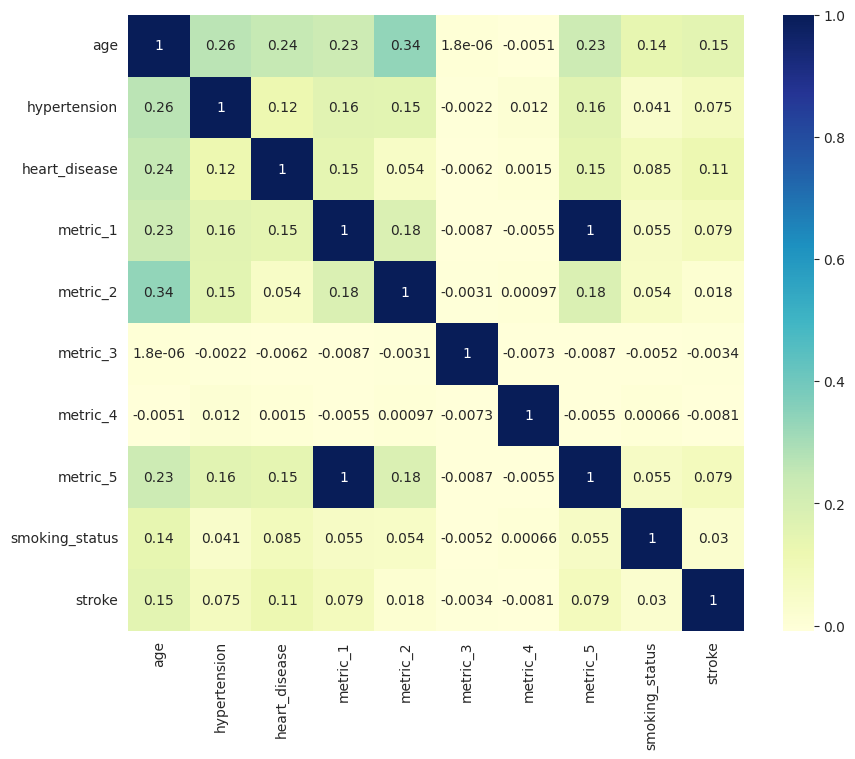

In [29]:
plt.figure(figsize=(10,8))
cor = data.drop('id', axis=1).corr()
sns.heatmap(cor, annot=True,square=True, cmap='YlGnBu');
plt.show()

In [30]:
"""
mutual_info_score helps us to select features in high dimensional data based on the score ghjkl;
"""
def find_relation(series):
    return mutual_info_score(series, data['stroke']) 

cat_data = data.iloc[:, 1:-1].apply(find_relation) 
cat_data

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

gender            0.000068
age               0.015768
married           0.003133
hypertension      0.002037
heart_disease     0.003582
occupation        0.003651
residence         0.000003
metric_1          0.055822
metric_2          0.008188
metric_3          0.000006
metric_4          0.008734
metric_5          0.055822
smoking_status    0.001070
dtype: float64

<Axes: >

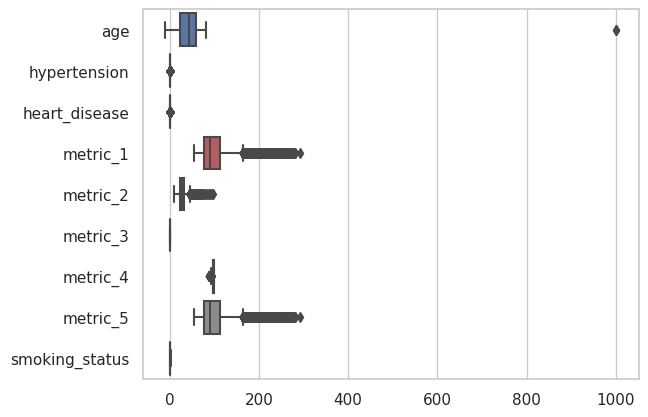

In [31]:
sns.set(style="whitegrid")

# Remove the first column from data
data_no_first_col = data.iloc[:, 1:-1]

# Visualize boxplots for each column in df
sns.boxplot(data=data_no_first_col, orient="h")


In [32]:
def count_outliers(data, cols):
    for col in cols:
        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)
        iqr = q3 - q1

        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        num_outliers = np.sum((data[col] < lower_bound) | (data[col] > upper_bound))

        print(f"Number of outliers in {col}: {num_outliers}")

cols = ['metric_1', 'metric_2', 'metric_4', 'metric_5']
count_outliers(data, cols)



Number of outliers in metric_1: 4978
Number of outliers in metric_2: 1084
Number of outliers in metric_4: 386
Number of outliers in metric_5: 4978


In [33]:
#outliers are present in all coulmns expect smoking status and metric3


In [34]:
#handling the age outlier
# calculate the mean of the age column
age_mean = data[(data['age'] >= 0) & (data['age'] <= 99)]['age'].mean()

# replace values outside the range with the mean
data.loc[(data['age'] < 0) | (data['age'] > 99), 'age'] = age_mean


In [35]:
#handling the outliers in metrics columns

In [36]:
q1 = data['metric_1'].quantile(0.25)
q3 = data['metric_1'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Identify outliers and replace them with the median value
med = data['metric_1'].median()
data.loc[(data['metric_1'] <= lower_bound) | (data['metric_1'] >= upper_bound) , 'metric_1'] = med


In [48]:
def replace_outliers_with_median(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        med = df[col].median()
        df.loc[(df[col] <= lower_bound) | (df[col] >= upper_bound) , col] = med
    return df

columns = ['metric_1', 'metric_2', 'metric_4', 'metric_5']
data = replace_outliers_with_median(data, columns)

<Axes: >

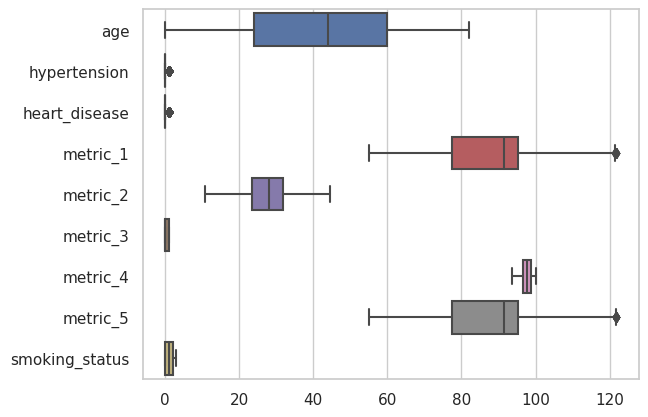

In [49]:
sns.boxplot(data=data.iloc[:, 1:-1], orient="h")


In [50]:
cols = ['metric_1', 'metric_2', 'metric_4', 'metric_5']
count_outliers(data, cols)

Number of outliers in metric_1: 11
Number of outliers in metric_2: 0
Number of outliers in metric_4: 0
Number of outliers in metric_5: 15


B    24834
D     6793
A     6156
E     5440
C      177
Name: occupation, dtype: int64


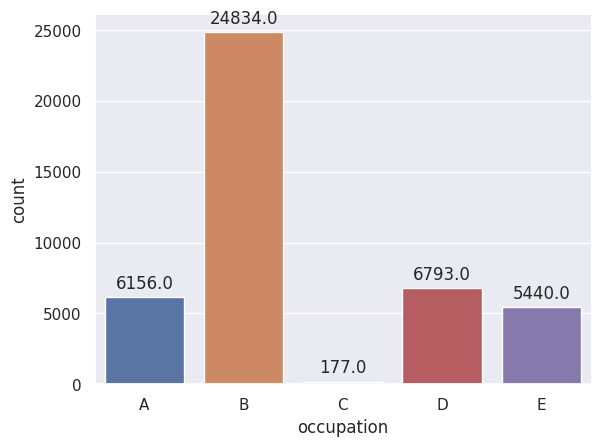

In [51]:
sns.set_theme(style='darkgrid')

# Print the value counts of each category in the 'occupation' column
print(data.occupation.value_counts())

# Create the countplot
ax = sns.countplot(data=data, x='occupation')

# Add text labels to the top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Show the plot
sns.despine()
plt.show()

0    16053
1    13292
3     7493
2     6562
Name: smoking_status, dtype: int64
0    42617
1      783
Name: stroke, dtype: int64
0    39339
1     4061
Name: hypertension, dtype: int64
Yes    27938
No     15462
Name: married, dtype: int64
0    41338
1     2062
Name: heart_disease, dtype: int64
Female    25665
Male      17724
Other        11
Name: gender, dtype: int64


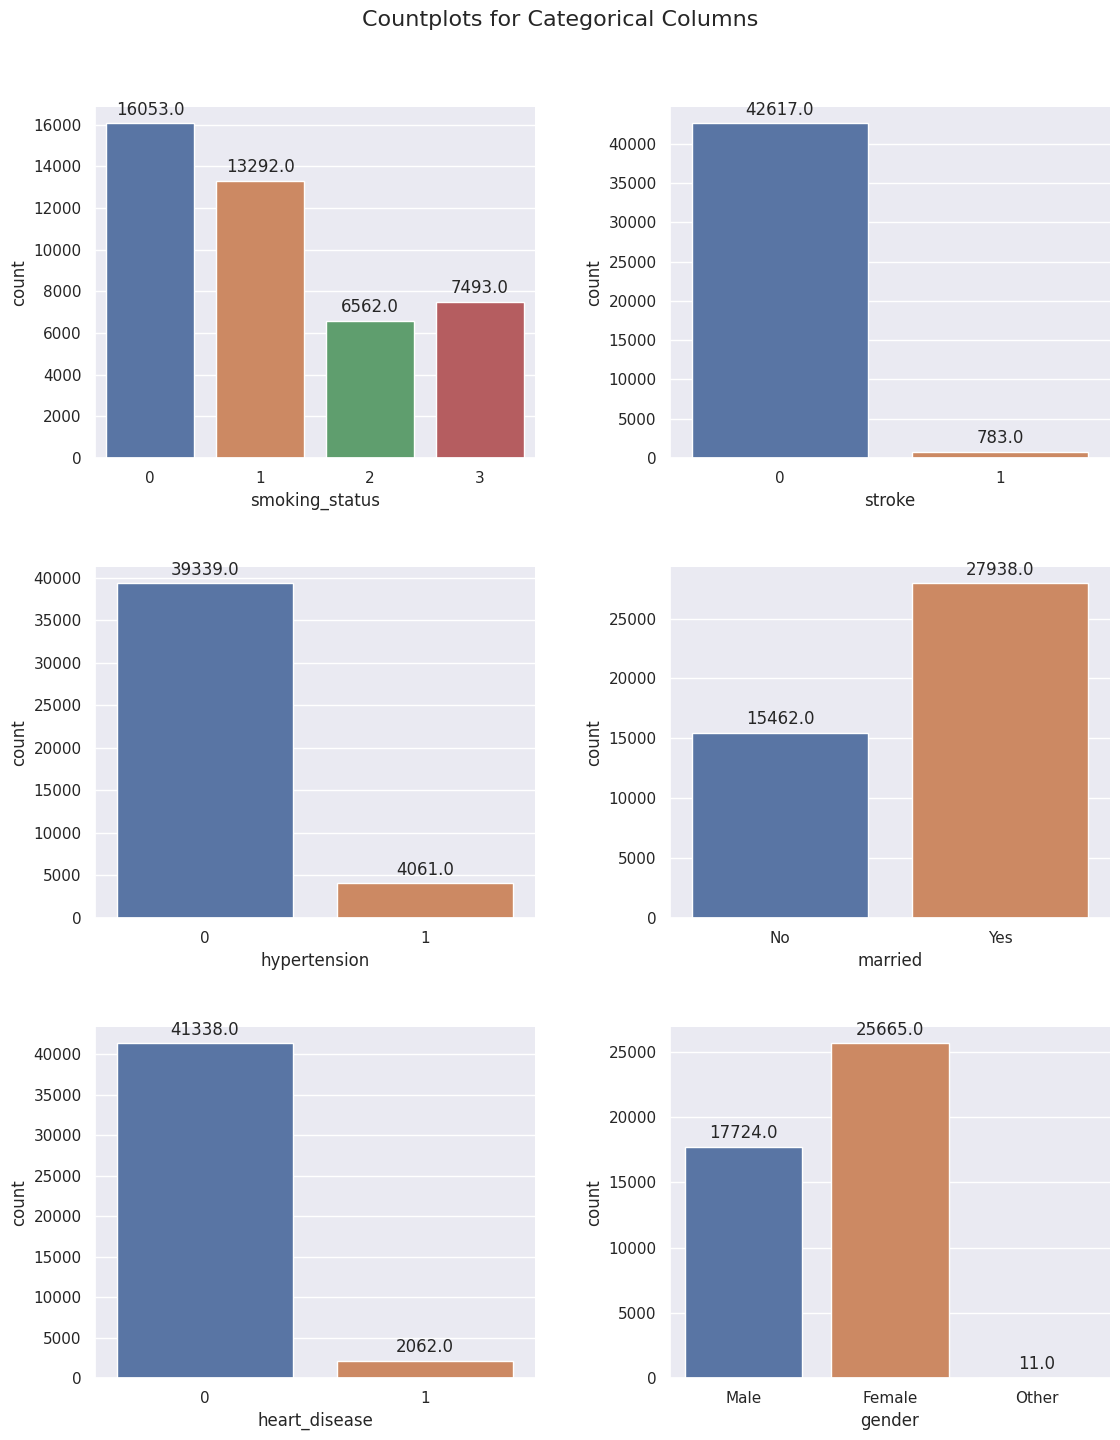

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_countplot(data, col, ax):
    sns.set_theme(style='darkgrid')
    
    # Print the value counts of each category in the column
    print(data[col].value_counts())
    
    # Create the countplot
    sns.countplot(data=data, x=col, ax=ax)
    
    # Add text labels to the top of the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
    # Remove the top and right spines
    sns.despine()
    

# Create a figure with 6 subplots arranged in 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Call the function for each column and subplot
create_countplot(data, 'smoking_status', axs[0, 0])
create_countplot(data, 'stroke', axs[0, 1])
create_countplot(data, 'hypertension', axs[1, 0])
create_countplot(data, 'married', axs[1, 1])
create_countplot(data, 'heart_disease', axs[2, 0])
create_countplot(data, 'gender', axs[2, 1])


# Add a title to the figure
fig.suptitle('Countplots for Categorical Columns', fontsize=16)

# Adjust the spacing between the subplots
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()


In [53]:
import pandas as pd
from tabulate import tabulate

def find_dist(columns):
    for col in columns:
        # Create a cross-tabulation of the two columns
        cross_tab = pd.crosstab(data[col], data['stroke'])
        # Print the cross-tabulation in a neat table format
        print(tabulate(cross_tab, headers='keys', tablefmt='psql'), "\n")

find_dist(["hypertension","heart_disease","occupation","residence","smoking_status"])


+----------------+-------+-----+
|   hypertension |     0 |   1 |
|----------------+-------+-----|
|              0 | 38756 | 583 |
|              1 |  3861 | 200 |
+----------------+-------+-----+ 

+-----------------+-------+-----+
|   heart_disease |     0 |   1 |
|-----------------+-------+-----|
|               0 | 40732 | 606 |
|               1 |  1885 | 177 |
+-----------------+-------+-----+ 

+--------------+-------+-----+
| occupation   |     0 |   1 |
|--------------+-------+-----|
| A            |  6154 |   2 |
| B            | 24393 | 441 |
| C            |   177 |   0 |
| D            |  6542 | 251 |
| E            |  5351 |  89 |
+--------------+-------+-----+ 

+-------------+-------+-----+
| residence   |     0 |   1 |
|-------------+-------+-----|
| Rural       | 21260 | 384 |
| Urban       | 21357 | 399 |
+-------------+-------+-----+ 

+------------------+-------+-----+
|   smoking_status |     0 |   1 |
|------------------+-------+-----|
|                0 | 15769

Pie chart showing the distribution of stroke in the dataset

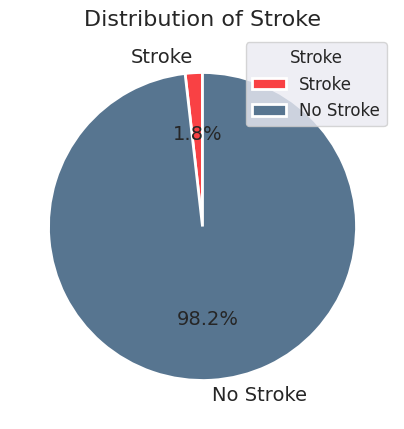

In [54]:
import matplotlib.pyplot as plt

# Count the number of strokes and non-strokes
num_strokes = data['stroke'].sum()
num_non_strokes = len(data) - num_strokes

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie([num_strokes, num_non_strokes], labels=['Stroke', 'No Stroke'], 
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}, 
        colors=['#F94144', '#577590'], wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Add a title and legend
plt.title('Distribution of Stroke', fontsize=16)
plt.legend(title='Stroke', loc='upper right', labels=['Stroke', 'No Stroke'], fontsize=12)

# Show the plot
plt.show()


In [55]:
# Group the data by married status and gender, and count the number of strokes in each group
grouped_data = data[data['stroke'] == 1].groupby(['married', 'gender']).size().reset_index(name='Stroke Count')

# Create a pie chart using Plotly Express
fig = ex.pie(grouped_data, values='Stroke Count', names=['Married Male', 'Married Female', 'Unmarried Male', 'Unmarried Female'],
             title='Stroke Cases by Married Status and Gender')

fig.show()


In [56]:
orig_data['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [57]:
"""
Plotting Different Smoking Categories that had stroke
"""
had_stroke = data.query('stroke ==1').copy()
smoking_labels = {0: 'never smoked', 1: 'unknown', 2: 'formerly smoked', 3: 'smokes'}
had_stroke['smoking_labels'] = had_stroke['smoking_status'].map(smoking_labels)

fig = ex.pie(had_stroke, names='smoking_labels')
fig.update_layout(title='<b> <i>Different Smoking Categories that had stroke<i></b>')
fig.show()


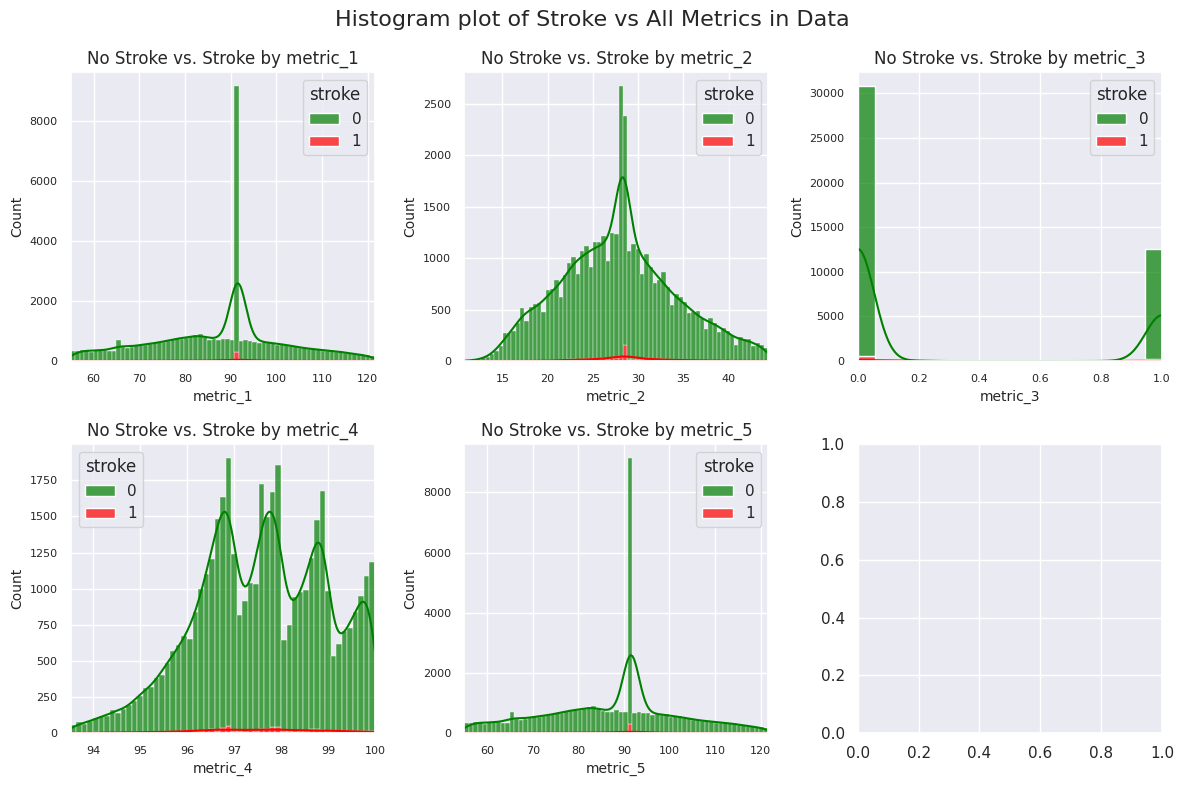

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metrics_vs_stroke(data, metric_cols, figsize=(12, 8)):
    sns.set_theme(style='darkgrid')
    num_metrics = len(metric_cols)
    num_cols = 3
    num_rows = (num_metrics + num_cols - 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
    axs = axs.flatten()
    
    for i, metric in enumerate(metric_cols):
        sns.histplot(data=data, x=metric, hue='stroke', kde=True, palette=['green', 'red'], alpha=0.7, multiple='stack', ax=axs[i])
        axs[i].set_xlim([data[metric].min(), data[metric].max()])
        axs[i].set_title(f'No Stroke vs. Stroke by {metric}', fontsize=12)
        axs[i].set_xlabel(metric, fontsize=10)
        axs[i].set_ylabel('Count', fontsize=10)
        axs[i].tick_params(axis='both', which='major', labelsize=8)
    
    fig.suptitle('Histogram plot of Stroke vs All Metrics in Data', fontsize=16)
    plt.tight_layout()
    plt.show()


metric_cols = ['metric_1', 'metric_2', 'metric_3', 'metric_4', 'metric_5']
plot_metrics_vs_stroke(data, metric_cols)


In [59]:
data.columns

Index(['id', 'gender', 'age', 'married', 'hypertension', 'heart_disease',
       'occupation', 'residence', 'metric_1', 'metric_2', 'metric_3',
       'metric_4', 'metric_5', 'smoking_status', 'stroke'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataset
data_encoded = data.copy()

# Loop over each column in the dataset and encode it using LabelEncoder
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])



In [61]:
data.head()

id  gender   age  married  hypertension  heart_disease  occupation  \
0   1       1   3.0        0             0              0           0   
1   2       1  58.0        1             1              0           1   
2   3       0   8.0        0             0              0           1   
3   4       0  70.0        1             0              0           1   
4   5       1  14.0        0             0              0           2   

   residence  metric_1  metric_2  metric_3  metric_4  metric_5  \
0          0     95.12      18.0         1     99.35     95.12   
1          1     87.96      39.2         1     99.70     87.96   
2          1    110.89      17.6         0     96.35    110.89   
3          0     69.04      35.9         0     95.52     69.04   
4          0     91.58      19.1         1     95.10     91.58   

   smoking_status  stroke  
0               1       0  
1               0       0  
2               1       0  
3               3       0  
4               1       0

In [62]:
X=data.drop('stroke',axis=1)
y=data['stroke']

In [63]:

# Split the data into train and test sets, preserving the class distribution
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [64]:
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

##Generalised_linear_model (GLM) with LogisticRegression

Accuracy for GLM using LogisticRegression 0.9819124423963134


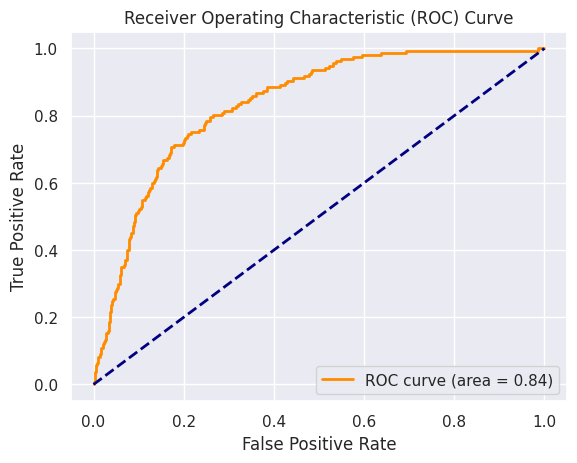

Accuracy for GLM using LogisticRegression: 0.9819124423963134
AUC score for GLM using LogisticRegression: 0.8374387476076349


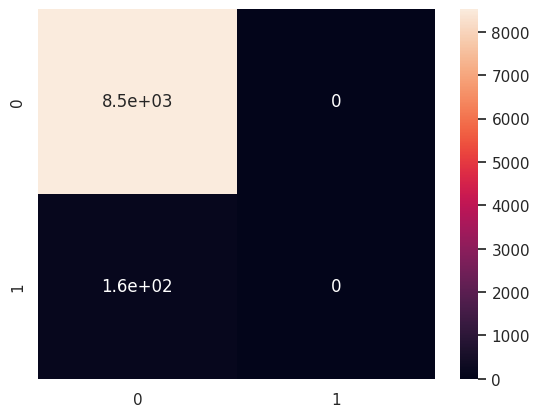

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# create a logistic regression model
glm = LogisticRegression()

# fit the model on the training data
glm.fit(X_train_std,Y_train)

# make predictions on the test data
Y_pred = glm.predict(X_test_std)

# calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy for GLM using LogisticRegression", accuracy)

# calculate probabilities for ROC curve
Y_pred_prob = glm.predict_proba(X_test_std)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred))
sns.heatmap(cm, annot=True)


'''# plot confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=glm.classes_)
disp.plot()
plt.show()'''

# print accuracy and AUC score
print("Accuracy for GLM using LogisticRegression:", accuracy)
print("AUC score for GLM using LogisticRegression:", roc_auc)

# plot accuracy graph
train_accuracy = []
test_accuracy = []
for i in range(1, 11):
    glm = LogisticRegression(max_iter=i*100)
    glm.fit(X_train_std,Y_train)
    train_accuracy.append(accuracy_score(Y_train, glm.predict(X_train_std)))
    test_accuracy.append(accuracy_score(Y_test, glm.predict(X_test_std)))


plt.show()


Accuracy for SVM: 0.9819124423963134


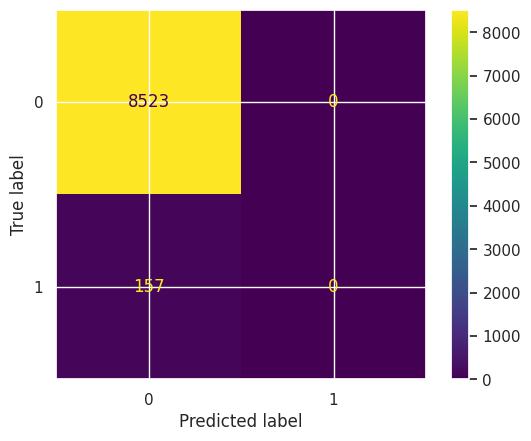

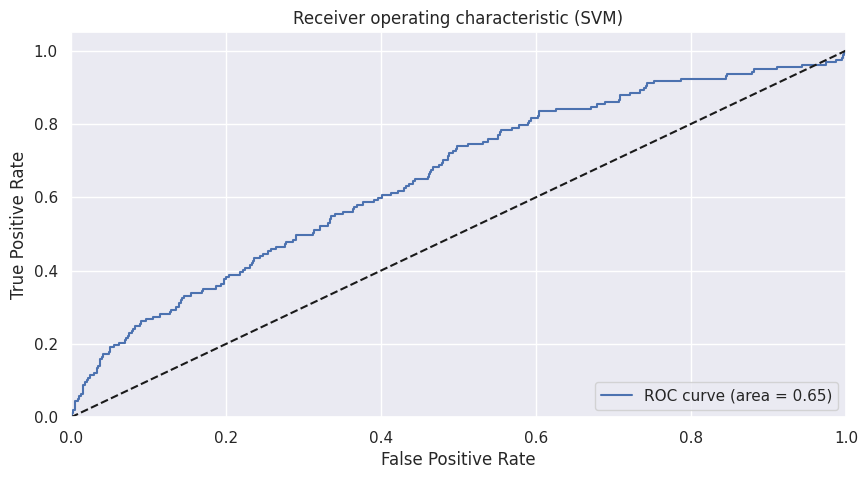

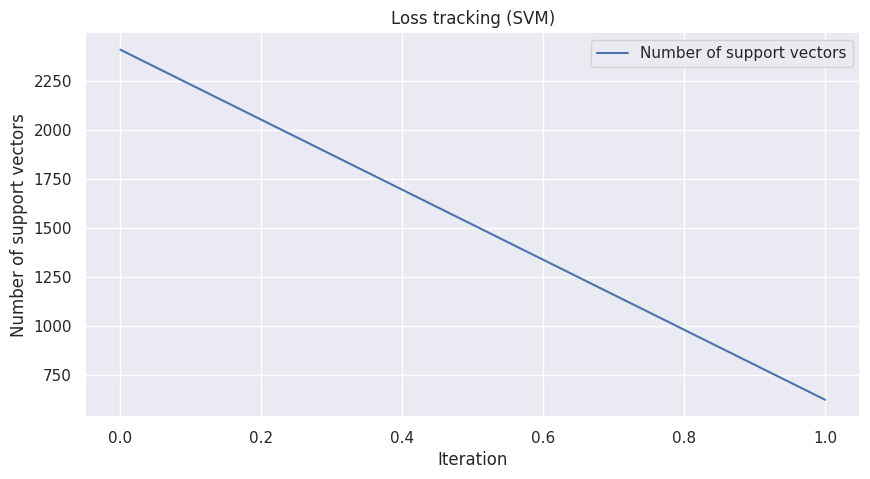

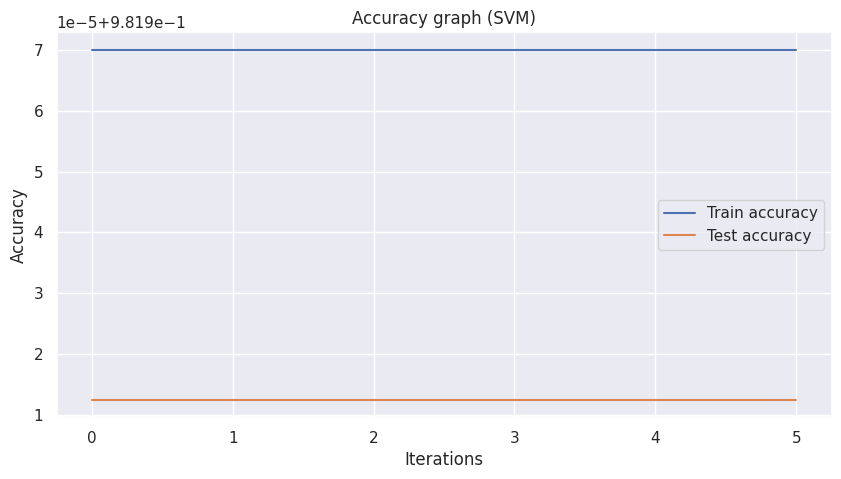

Accuracy for SVM: 0.9819124423963134


In [66]:
# create a SVM model with default hyperparameters
svc = SVC()

# fit the model on the training data
svc.fit(X_train_std, Y_train)

# make predictions on the test data
Y_pred = svc.predict(X_test_std)

# calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy for SVM:", accuracy)

# calculate probabilities for ROC curve
Y_pred_prob = svc.decision_function(X_test_std)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# create confusion matrix and display it
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

# plot ROC curve and display AUC score
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

# plot loss tracking and display accuracy score
plt.figure(figsize=(10, 5))
plt.plot(svc.n_support_, label='Number of support vectors')
plt.xlabel('Iteration')
plt.ylabel('Number of support vectors')
plt.title('Loss tracking (SVM)')
plt.legend(loc="best")
plt.show()

# plot accuracy graph
svc = SVC() # reset the model
svc.fit(X_train_std, Y_train)
train_acc = accuracy_score(Y_train, svc.predict(X_train_std))
test_acc = accuracy_score(Y_test, svc.predict(X_test_std))
train_acc_list, test_acc_list = [train_acc], [test_acc]

for i in range(5):
    svc.fit(X_train_std, Y_train)
    train_acc = accuracy_score(Y_train, svc.predict(X_train_std))
    test_acc = accuracy_score(Y_test, svc.predict(X_test_std))
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

plt.figure(figsize=(10, 5))
plt.plot(train_acc_list, label='Train accuracy')
plt.plot(test_acc_list, label='Test accuracy')
plt.title('Accuracy graph (SVM)')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# display accuracy score
print("Accuracy for SVM:", accuracy)


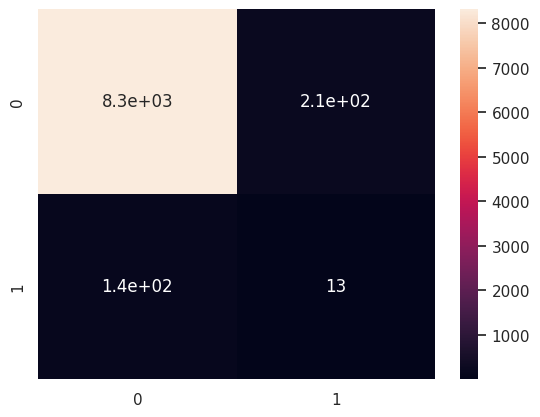

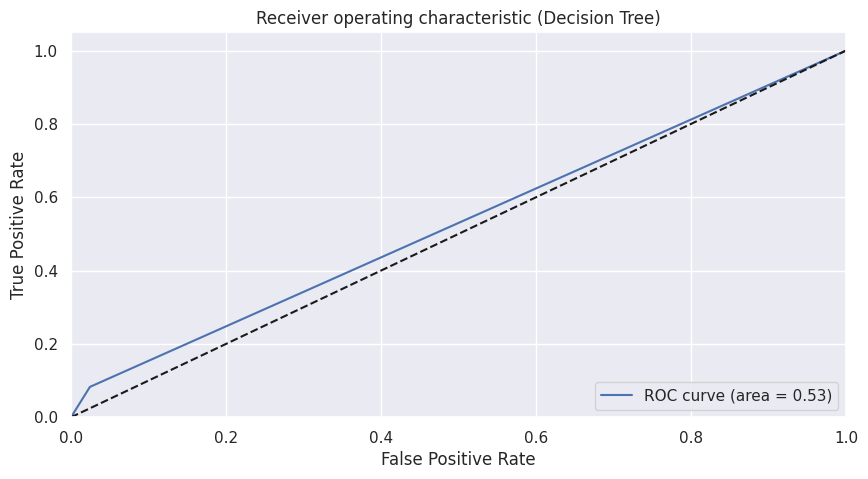

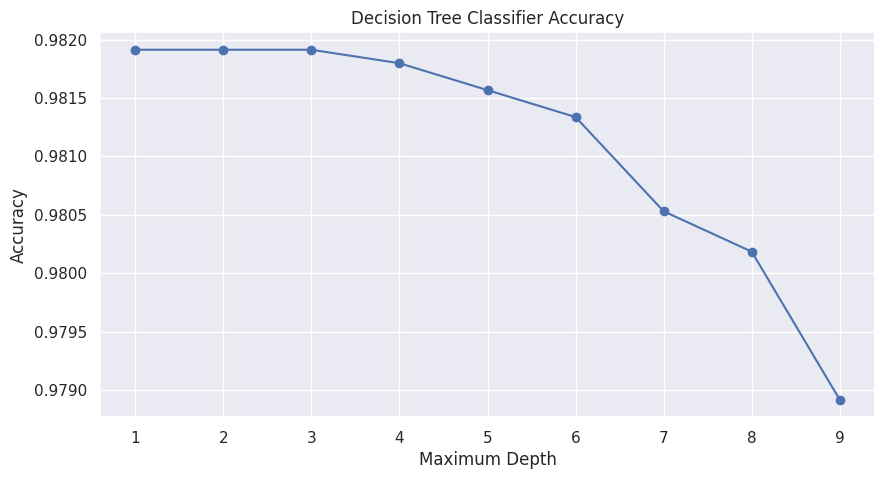

Accuracy for DecisionTreeClassifier: 0.9789170506912442
AUC score for DecisionTreeClassifier: 0.5291989976915218


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# create a Decision Tree model
dt_clf = DecisionTreeClassifier()

# fit the model on the training data
dt_clf.fit(X_train_std, Y_train)

# make predictions on the test data
Y_pred = dt_clf.predict(X_test_std)

# calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred))
sns.heatmap(cm, annot=True)

# calculate probabilities for ROC curve
Y_pred_prob = dt_clf.predict_proba(X_test_std)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve and display AUC score
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# plot accuracy over different maximum depth values
max_depths = range(1, 10)
accuracies = []
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth)
    dt_clf.fit(X_train_std, Y_train)
    Y_pred = dt_clf.predict(X_test_std)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, 'o-')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()

# print accuracy score and AUC score
print("Accuracy for DecisionTreeClassifier:", accuracy)
print("AUC score for DecisionTreeClassifier:", roc_auc)


In [68]:
# Calculate the balance of the dataset in percentage
balance = data['stroke'].value_counts(normalize=True) * 100

print(f"Positive instances: {balance[1]:.2f}%")
print(f"Negative instances: {balance[0]:.2f}%")

Positive instances: 1.80%
Negative instances: 98.20%


results after SMOTE upsampling

In [69]:

# Separate predictors (X) and target variable (y)
X = data.drop(columns=['id', 'stroke'])
y = data['stroke']

# Print the value counts of the target variable before upsampling
print("Before upsampling:")
print(y.value_counts())
print("Percentage distribution:")
print(y.value_counts(normalize=True)*100)

# Apply SMOTE oversampling to balance the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Recombine the predictors and target variable into a new DataFrame
upsampled_df = X.assign(stroke=y)

# Print the value counts of the target variable after upsampling
print("\nAfter upsampling:")
print(upsampled_df['stroke'].value_counts())
print("Percentage distribution:")
print(upsampled_df['stroke'].value_counts(normalize=True)*100)


Before upsampling:
0    42617
1      783
Name: stroke, dtype: int64
Percentage distribution:
0    98.195853
1     1.804147
Name: stroke, dtype: float64

After upsampling:
0    42617
1    42617
Name: stroke, dtype: int64
Percentage distribution:
0    50.0
1    50.0
Name: stroke, dtype: float64


I have produced a new dataset using SMOTE upsampling, and it has an equal number of samples for both stroke outcomes. This will make it easier for our models to identify the characteristics that distinguish between stroke and nnon-stroke

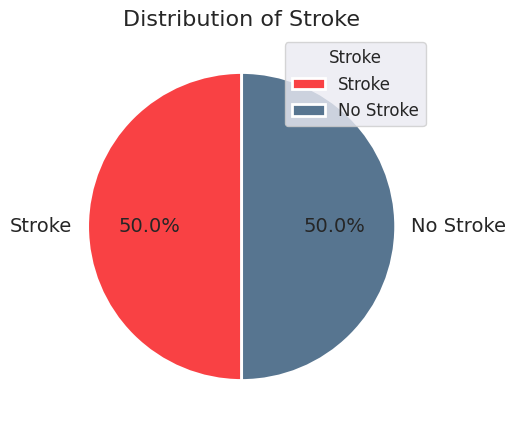

In [70]:
import matplotlib.pyplot as plt

# Count the number of strokes and non-strokes
num_strokes = upsampled_df['stroke'].sum()
num_non_strokes = len(upsampled_df) - num_strokes

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie([num_strokes, num_non_strokes], labels=['Stroke', 'No Stroke'], 
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}, 
        colors=['#F94144', '#577590'], wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Add a title and legend
plt.title('Distribution of Stroke', fontsize=16)
plt.legend(title='Stroke', loc='upper right', labels=['Stroke', 'No Stroke'], fontsize=12)


# Show the plot
plt.show()


In [71]:
upsampled_df.head()

gender   age  married  hypertension  heart_disease  occupation  residence  \
0       1   3.0        0             0              0           0          0   
1       1  58.0        1             1              0           1          1   
2       0   8.0        0             0              0           1          1   
3       0  70.0        1             0              0           1          0   
4       1  14.0        0             0              0           2          0   

   metric_1  metric_2  metric_3  metric_4  metric_5  smoking_status  stroke  
0     95.12      18.0         1     99.35     95.12               1       0  
1     87.96      39.2         1     99.70     87.96               0       0  
2    110.89      17.6         0     96.35    110.89               1       0  
3     69.04      35.9         0     95.52     69.04               3       0  
4     91.58      19.1         1     95.10     91.58               1       0

In [ ]:
pip install pandas-profiling


In [74]:
import pandas_profiling

# Generate the Pandas Profiling report
profile = upsampled_df.profile_report(title='Dataset Profiling Report')

# Save the report as an HTML file
profile.to_file(output_file='dataset_report.html')

from IPython.display import display_html

display_html(profile.to_html(), raw=True)

<ipython-input-74-3fdbc6fb88d6>:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<!doctype html> Dataset Profiling Report Toggle navigation Dataset Profiling Report Overview Variables Interactions Correlations Missing values Sample Duplicate rows Overview Overview Alerts 9 Reproduction Dataset statistics Number of variables 14 Number of observations 85234 Missing cells 0 Missing cells (%) 0.0% Duplicate rows 1 Duplicate rows (%) < 0.1% Total size in memory 9.1 MiB Average record size in memory 112.0 B Variable types Categorical 9 Numeric 5 Alerts Dataset has 1 (< 0.1%) duplicate rows Duplicates age is highly overall correlated with married and 1 other fields High correlation metric_1 is highly overall correlated with metric_5 High correlation metric_5 is highly overall correlated with metric_1 High correlation married is highly overall correlated with age High correlation stroke is highly overall correlated with age High correlation hypertension is highly imbalanced (58.5%) Imbalance heart_disease is highly imbalanced (68.8%) Imbalance stroke is uniformly distributed Uniform Reproduction Analysis started 2023-04-29 01:22:16.912191 Analysis finished 2023-04-29 01:22:56.774477 Duration 39.86 seconds Software version pandas-profiling v3.6.6 Download configuration <a download=config.json href="data:text/plain;charset=utf-8,%7B%22title%22%3A%20%22Dataset%20Profiling%20Report%22%2C%20%22dataset%22%3A%20%7B%22description%22%3A%20%22%22%2C%20%22creator%22%3A%20%22%22%2C%20%22author%22%3A%20%22%22%2C%20%22copyright_holder%22%3A%20%22%22%2C%20%22copyright_year%22%3A%20%22%22%2C%20%22url%22%3A%20%22%22%7D%2C%20%22variables%22%3A%20%7B%22descriptions%22%3A%20%7B%7D%7D%2C%20%22infer_dtypes%22%3A%20true%2C%20%22show_variable_description%22%3A%20true%2C%20%22pool_size%22%3A%200%2C%20%22progress_bar%22%3A%20true%2C%20%22vars%22%3A%20%7B%22num%22%3A%20%7B%22quantiles%22%3A%20%5B0.05%2C%200.25%2C%200.5%2C%200.75%2C%200.95%5D%2C%20%22skewness_threshold%22%3A%2020%2C%20%22low_categorical_threshold%22%3A%205%2C%20%22chi_squared_threshold%22%3A%200.999%7D%2C%20%22cat%22%3A%20%7B%22length%22%3A%20true%2C%20%22characters%22%3A%20true%2C%20%22words%22%3A%20true%2C%20%22cardinality_threshold%22%3A%2050%2C%20%22imbalance_threshold%22%3A%200.5%2C%20%22n_obs%22%3A%205%2C%20%22chi_squared_threshold%22%3A%200.999%2C%20%22coerce_str_to_date%22%3A%20false%2C%20%22redact%22%3A%20false%2C%20%22histogram_largest%22%3A%2050%2C%20%22stop_words%22%3A%20%5B%5D%7D%2C%20%22image%22%3A%20%7B%22active%22%3A%20false%2C%20%22exif%22%3A%20true%2C%20%22hash%22%3A%20true%7D%2C%20%22bool%22%3A%20%7B%22n_obs%22%3A%203%2C%20%22imbalance_threshold%22%3A%200.5%2C%20%22mappings%22%3A%20%7B%22t%22%3A%20true%2C%20%22f%22%3A%20false%2C%20%22yes%22%3A%20true%2C%20%22no%22%3A%20false%2C%20%22y%22%3A%20true%2C%20%22n%22%3A%20false%2C%20%22true%22%3A%20true%2C%20%22false%22%3A%20false%7D%7D%2C%20%22path%22%3A%20%7B%22active%22%3A%20false%7D%2C%20%22file%22%3A%20%7B%22active%22%3A%20false%7D%2C%20%22url%22%3A%20%7B%22active%22%3A%20false%7D%2C%20%22timeseries%22%3A%20%7B%22active%22%3A%20false%2C%20%22sortby%22%3A%20null%2C%20%22autocorrelation%22%3A%200.7%2C%20%22lags%22%3A%20%5B1%2C%207%2C%2012%2C%2024%2C%2030%5D%2C%20%22significance%22%3A%200.05%2C%20%22pacf_acf_lag%22%3A%20100%7D%7D%2C%20%22sort%22%3A%20null%2C%20%22missing_diagrams%22%3A%20%7B%22bar%22%3A%20true%2C%20%22matrix%22%3A%20true%2C%20%22heatmap%22%3A%20true%7D%2C%20%22correlations%22%3A%20%7B%22auto%22%3A%20%7B%22key%22%3A%20%22auto%22%2C%20%22calculate%22%3A%20true%2C%20%22warn_high_correlations%22%3A%2010%2C%20%22threshold%22%3A%200.5%2C%20%22n_bins%22%3A%2010%7D%7D%2C%20%22correlation_table%22%3A%20true%2C%20%22interactions%22%3A%20%7B%22continuous%22%3A%20true%2C%20%22targets%22%3A%20%5B%5D%7D%2C%20%22categorical_maximum_correlation_distinct%22%3A%20100%2C%20%22memory_deep%22%3A%20false%2C%20%22plot%22%3A%20%7B%22missing%22%3A%20%7B%22force_labels%22%3A%20true%2C%20%22cmap%22%3A%20%22RdBu%22%7D%2C%20%22image_format%22%3A%20%22svg%22%2C%20%22correlation%22%3A%20%7B%22cmap%22%3A%20%22RdBu%22%2C%20%22

In [75]:
"""from google.colab import files
files.download('/path/to/stroke_dataset_report.html')
"""

"from google.colab import files\nfiles.download('/path/to/stroke_dataset_report.html')\n"

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                85234
Model:                            GLM   Df Residuals:                    85221
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35315.
Date:                Sat, 29 Apr 2023   Deviance:                       70630.
Time:                        02:52:48   Pearson chi2:                 8.08e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4274
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

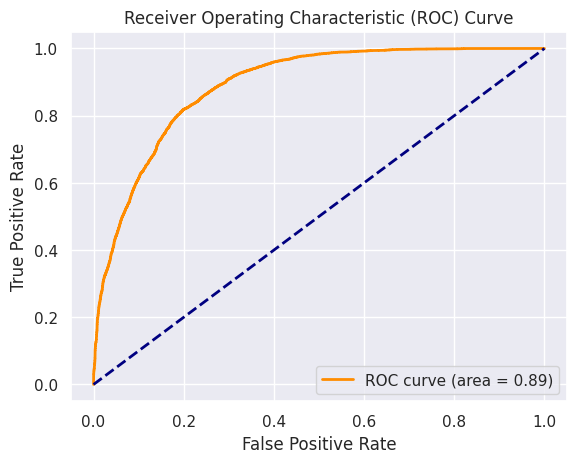

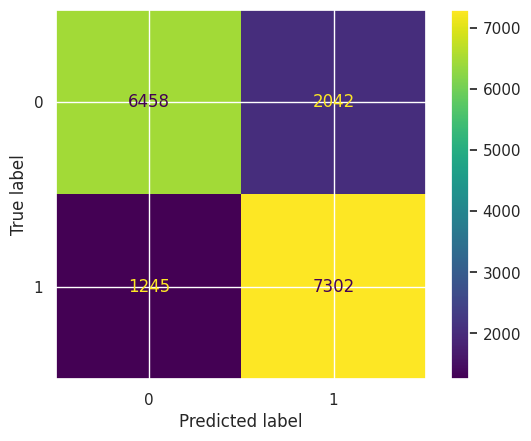

In [84]:
X = upsampled_df.drop(columns=['stroke'])
y = upsampled_df['stroke']

# Add a constant term to the predictors
X = sm.add_constant(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a GLM to the data
model = sm.GLM(y, X_scaled, family=sm.families.Binomial())
result = model.fit()

# Print the summary of the model
print(result.summary())

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Get the predicted probabilities for the test set
y_pred_proba = result.predict(X_test)

# Convert the probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot()
plt.show()

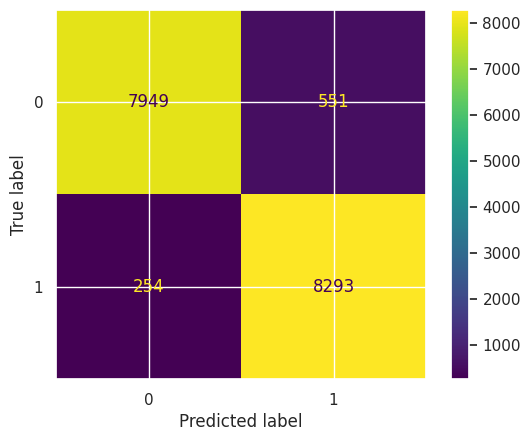

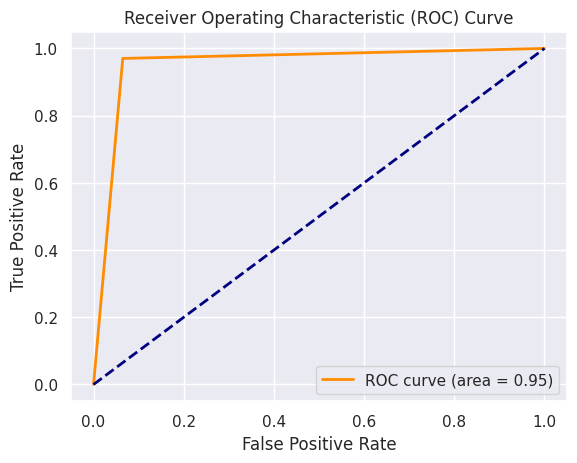

<ipython-input-77-558b7f61b5f1>:40: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



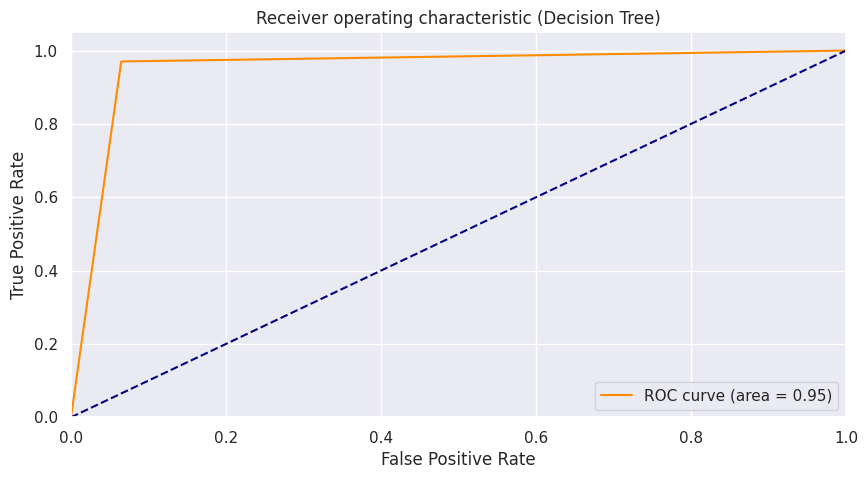

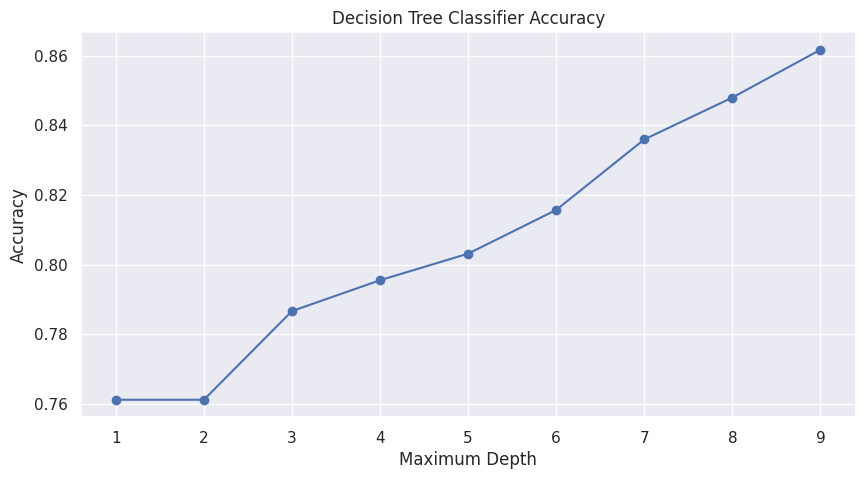

Accuracy for DecisionTreeClassifier: 0.8616765413269197
AUC score for DecisionTreeClassifier: 0.9527292204351028


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# create a Decision Tree model
dt_clf = DecisionTreeClassifier()

# fit the model on the training data
dt_clf.fit(X_train, y_train)

# make predictions on the test data
Y_pred = dt_clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, Y_pred)

# create confusion matrix and display it
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot()
plt.show()

# calculate probabilities for ROC curve
Y_pred_prob = dt_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# plot ROC curve and display AUC score
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# plot accuracy over different maximum depth values
max_depths = range(1, 10)
accuracies = []
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth)
    dt_clf.fit(X_train, y_train)
    Y_pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracies, 'o-')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()

# print accuracy score and AUC score
print("Accuracy for DecisionTreeClassifier:", accuracy)
print("AUC score for DecisionTreeClassifier:", roc_auc)


In [78]:
print(data.columns)

Index(['id', 'gender', 'age', 'married', 'hypertension', 'heart_disease',
       'occupation', 'residence', 'metric_1', 'metric_2', 'metric_3',
       'metric_4', 'metric_5', 'smoking_status', 'stroke'],
      dtype='object')


In [80]:
pip install lime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=cf6aba1371aac7d2dd50205dcf6ed77b007c63d734a6b849964406dc8c61263e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [81]:
import lime
import lime.lime_tabular

# LIME has one explainer for all the models
feature_names = ['id', 'gender', 'age', 'married', 'hypertension', 'heart_disease',
       'occupation', 'residence', 'metric_1', 'metric_2', 'metric_3',
       'metric_4', 'metric_5', 'smoking_status', 'stroke']
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names,
                                                  class_names=['stroke'], verbose=True, mode='classification')

j = 1
exp = explainer.explain_instance(X_test[j], dt_clf.predict_proba, num_features=5)


Intercept 0.05996400978852123
Prediction_local [0.75741738]
Right: 0.9415971394517283


In [82]:
# Show the predictions
exp.show_in_notebook(show_table=True, show_all=False)


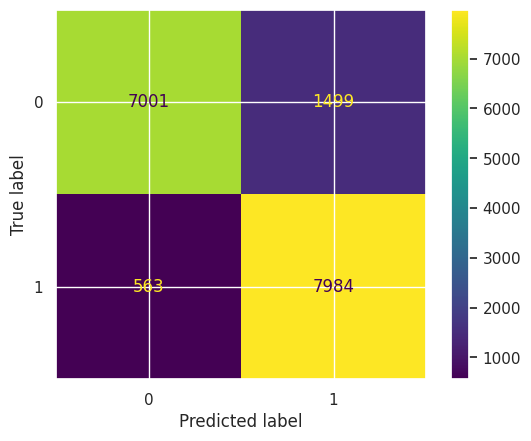

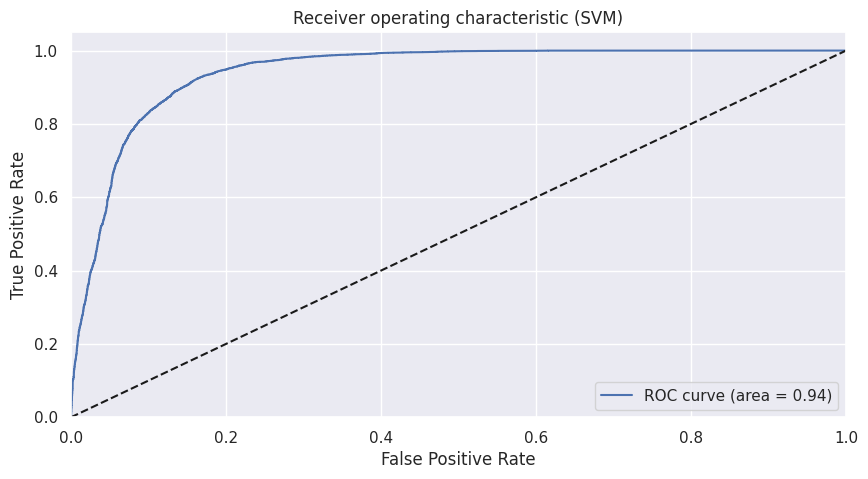

Accuracy for SVM: 0.8790403003461019
AUC score for SVM: 0.9415876089993738


In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# create an SVM model
svc = SVC(probability=True)

# fit the model on the training data
svc.fit(X_train, y_train)

# make predictions on the test data
Y_pred = svc.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, Y_pred)

# create confusion matrix and display it
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

# calculate probabilities for ROC curve
Y_pred_prob = svc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve and display AUC score
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

# print accuracy score and AUC score
print("Accuracy for SVM:", accuracy)
print("AUC score for SVM:", roc_auc)
